In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [4]:
df = pd.read_excel('dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.xlsx'

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('\xa0', '_') for c in df.columns]
df.columns = [c.replace('(', '_') for c in df.columns]
df.columns = [c.replace(')', '_') for c in df.columns]

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]

# Obróbka danych.

In [ ]:
df

In [5]:
g_0 = df.groupby('SARS-Cov-2_exam_result')
df_positive = g_0.get_group('positive')
df_negative = g_0.get_group('negative')
positive_0 = len(df_positive)
negative_0 = len(df_negative)

NameError: name 'df' is not defined

In [6]:
plt.bar(['Pozytywny', 'Negatywny'],[positive_0, negative_0], color="purple")
plt.title('Wyniki testu na SARS-CoV-2')
plt.xlabel('Wynik')
plt.ylabel('Ilość')
plt.show()

NameError: name 'positive_0' is not defined

Zakładam, że pracownicy szpitala w Brazylii zlecali morfologię krwi, nie badanie hemoglobiny czy płytek krwi oddzielnie, dlatego wystarczy wpisać jeden element zamiast wszystkich, a większość wyników będzie się zgadzać.

In [769]:
df2 = df.dropna(subset=['Hematocrit'])
df2 = df2.reset_index(drop=True)

In [770]:
df2

,Patient_ID,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward__1=yes,_0=no_","Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_","Patient_addmited_to_intensive_care_unit__1=yes,_0=no_",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,...,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
2,6c9d3323975b082,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d3ea751f3db9de9,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2c2eae16c12a18a,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,c5b44ff9c7782fd,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.908221,...,0.22499,-0.202859,-0.011817,0.11312,-0.074619,-0.066989,-0.159955,-0.597097,NaN,0.182693
599,88cce1444e16f9c,19,negative,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,2733fac0d3f7138,15,negative,0,0,0,0.717175,1.105468,-0.492289,-0.213711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,acd761fe16b5d0f,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Z 5644 wyników zostały 603. To źle, ale sama odpowiedź na pytanie czy pacjent został zakażony bez dodatkowych informacji jest bezużyteczna. Nie będę analizował 110 kolumn, a wyłącznie te, które dotyczą informacji związanych ze wspomnianą już krwią, więc usuwam kolumny, które nie są obecne zdecydowanej większości przypadków.

In [1]:
df2 = df2.dropna(axis='columns',thresh=590)
df2 = df2.reset_index(drop=True)

NameError: name 'df2' is not defined

In [2]:
df2

NameError: name 'df2' is not defined

ID pacjenta również nie wnosi żadnej istotnej wartości, więc usuwam.

In [773]:
df2 = df2.drop(['Patient_ID'], axis=1)

In [774]:
df2

,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward__1=yes,_0=no_","Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_","Patient_addmited_to_intensive_care_unit__1=yes,_0=no_",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
599,19,negative,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
600,15,negative,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
601,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


# Podział danych.

In [775]:
df2.groupby('SARS-Cov-2_exam_result').count()

,Patient_age_quantile,"Patient_addmited_to_regular_ward__1=yes,_0=no_","Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_","Patient_addmited_to_intensive_care_unit__1=yes,_0=no_",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
SARS-Cov-2_exam_result,,,,,,,,,,,,,,,,,,
negative,520,520,520,520,520,520,519,518,519,519,519,519,519,519,519,519,518,519
positive,83,83,83,83,83,83,83,81,83,83,83,83,83,83,83,83,83,83


In [776]:
g = df2.groupby('SARS-Cov-2_exam_result')
df2_positive = g.get_group('positive')
df2_positive = df2_positive.reset_index(drop=True)
df2_negative = g.get_group('negative')
df2_negative = df2_negative.reset_index(drop=True)
positive = len(df2_positive)
negative = len(df2_negative)

In [777]:
df2_positive

,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward__1=yes,_0=no_","Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_","Patient_addmited_to_intensive_care_unit__1=yes,_0=no_",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144
1,15,positive,1,0,0,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899
2,14,positive,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948
3,14,positive,0,0,0,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985
4,7,positive,0,0,0,0.694287,0.729532,-0.743526,0.235063,0.595655,-0.636887,0.343725,-0.606644,-0.223767,0.125903,-0.119138,-0.014074,0.882811,-0.713529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,18,positive,1,0,0,0.602732,0.353596,-1.082694,1.581381,0.119635,-0.943933,-0.751633,-1.255035,-1.140144,0.334989,-0.835508,0.807138,-1.507141,-0.978899
79,12,positive,1,0,0,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,-0.456253,0.126132,0.488863,-0.890442
80,14,positive,1,0,0,1.106281,1.042812,-0.253615,-0.438097,0.930631,-0.483364,0.044991,0.155841,-0.529226,0.073631,-0.793368,0.046015,-0.640455,0.171035
81,18,positive,0,0,0,1.197836,1.356092,-1.911774,1.132609,0.384090,0.966573,0.841616,-0.834833,-0.529226,1.589509,-0.582671,1.307876,1.197969,-0.094334


In [778]:
df2_negative

,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward__1=yes,_0=no_","Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_","Patient_addmited_to_intensive_care_unit__1=yes,_0=no_",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,negative,0,0,0,-1.869234,-1.776707,0.022745,-0.550290,-0.797144,2.570034,-0.054585,1.569499,-1.140144,-1.860418,-0.835508,-2.057088,0.567652,0.790231
516,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
517,19,negative,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
518,15,negative,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812


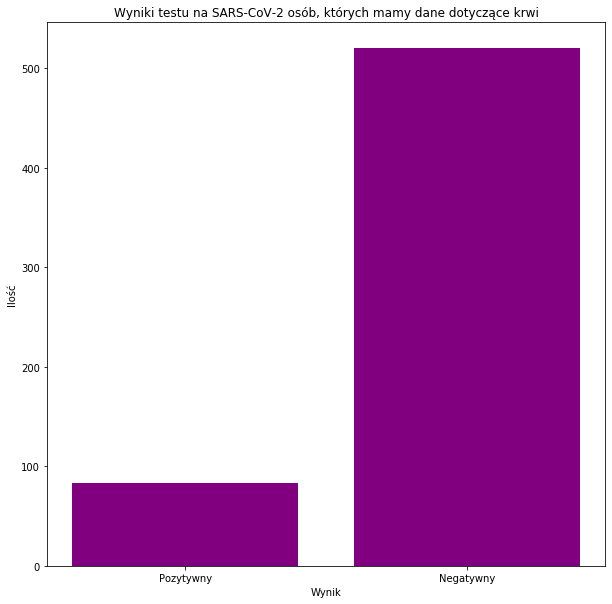

In [779]:
plt.bar(['Pozytywny', 'Negatywny'],[positive, negative], color="purple")
plt.title('Wyniki testu na SARS-CoV-2 osób, których mamy dane dotyczące krwi')
plt.xlabel('Wynik')
plt.ylabel('Ilość')
plt.show()

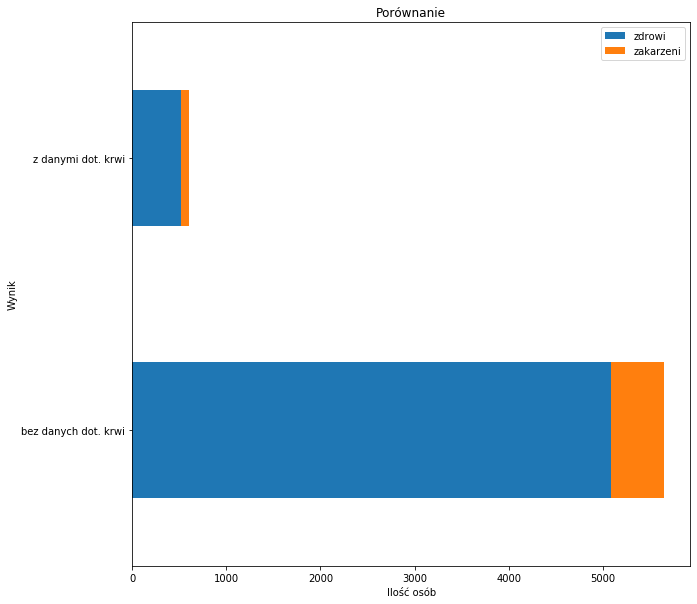

In [780]:
plotdata = pd.DataFrame({
    "zdrowi": [negative_0, negative],
    "zakarzeni": [positive_0, positive]
},
index=["bez danych dot. krwi", "z danymi dot. krwi"])
plotdata.plot(kind="barh", stacked=True)

plt.title('Porównanie')
plt.xlabel('Ilość osób')
plt.ylabel('Wynik')
plt.show()

In [784]:
df2 = df2.dropna()

# Porównanie parametrów krwi osób chorych i zdrowych.

In [809]:
negative_hematocrit = df2_negative.Hematocrit
positive_hematocrit = df2_positive.Hematocrit

negative_hemoglobin = df2_negative.Hemoglobin
positive_hemoglobin = df2_positive.Hemoglobin

negative_platelets = df2_negative.Platelets
negative_platelets = negative_platelets.apply (pd.to_numeric, errors='coerce')
negative_platelets = negative_platelets.dropna()
positive_platelets = df2_positive.Platelets

negative_MPV = df2_negative.Mean_platelet_volume_
negative_MPV = negative_MPV.apply (pd.to_numeric, errors='coerce')
negative_MPV = negative_MPV.dropna()
positive_MPV = df2_positive.Mean_platelet_volume_
positive_MPV = positive_MPV.apply (pd.to_numeric, errors='coerce')
positive_MPV = positive_MPV.dropna()

negative_RBC = df2_negative.Red_blood_Cells
negative_RBC = negative_RBC.apply (pd.to_numeric, errors='coerce')
negative_RBC = negative_RBC.dropna()
positive_RBC = df2_positive.Red_blood_Cells

negative_lymphocytes = df2_negative.Lymphocytes
negative_lymphocytes = negative_lymphocytes.apply (pd.to_numeric, errors='coerce')
negative_lymphocytes = negative_lymphocytes.dropna()
positive_lymphocytes = df2_positive.Lymphocytes

negative_MCHC = df2_negative.Mean_corpuscular_hemoglobin_concentration__MCHC_
negative_MCHC = negative_MCHC.apply (pd.to_numeric, errors='coerce')
negative_MCHC = negative_MCHC.dropna()
positive_MCHC = df2_positive.Mean_corpuscular_hemoglobin_concentration__MCHC_

negative_leukocytes = df2_negative.Leukocytes
negative_leukocytes = negative_leukocytes.apply (pd.to_numeric, errors='coerce')
negative_leukocytes = negative_leukocytes.dropna()
positive_leukocytes = df2_positive.Leukocytes

negative_basophils = df2_negative.Basophils
negative_basophils = negative_basophils.apply (pd.to_numeric, errors='coerce')
negative_basophils = negative_basophils.dropna()
positive_basophils = df2_positive.Basophils

negative_MCH = df2_negative.Mean_corpuscular_hemoglobin__MCH_
negative_MCH = negative_MCH.apply (pd.to_numeric, errors='coerce')
negative_MCH = negative_MCH.dropna()
positive_MCH = df2_positive.Mean_corpuscular_hemoglobin__MCH_

negative_eosinophils = df2_negative.Eosinophils
negative_eosinophils = negative_eosinophils.apply (pd.to_numeric, errors='coerce')
negative_eosinophils = negative_eosinophils.dropna()
positive_eosinophils = df2_positive.Eosinophils

negative_MCV = df2_negative.Mean_corpuscular_volume__MCV_
negative_MCV = negative_MCV.apply (pd.to_numeric, errors='coerce')
negative_MCV = negative_MCV.dropna()
positive_MCV = df2_positive.Mean_corpuscular_volume__MCV_

negative_monocytes = df2_negative.Monocytes
positive_monocytes = df2_positive.Monocytes
negative_monocytes = negative_monocytes.apply (pd.to_numeric, errors='coerce')
negative_monocytes = negative_monocytes.dropna()

negative_RDW = df2_negative.Red_blood_cell_distribution_width__RDW_
negative_RDW = negative_RDW.apply (pd.to_numeric, errors='coerce')
negative_RDW = negative_RDW.dropna()
positive_RDW = df2_positive.Red_blood_cell_distribution_width__RDW_

In [810]:
avg_negative_hematocrit= np.average(negative_hematocrit)
avg_positive_hematocrit= np.average(positive_hematocrit)

avg_negative_hemoglobin = np.average(negative_hemoglobin)
avg_positive_hemoglobin = np.average(positive_hemoglobin)

avg_negative_platelets = np.average(negative_platelets)
avg_positive_platelets = np.average(positive_platelets)

avg_negative_MPV = np.average(negative_MPV)
avg_positive_MPV = np.average(positive_MPV)

avg_negative_RBC = np.average(negative_RBC)
avg_positive_RBC = np.average(positive_RBC)

avg_negative_lymphocytes = np.average(negative_lymphocytes)
avg_positive_lymphocytes = np.average(positive_lymphocytes)

avg_negative_MCHC = np.average(negative_MCHC)
avg_positive_MCHC = np.average(positive_MCHC)

avg_negative_leukocytes = np.average(negative_leukocytes)
avg_positive_leukocytes = np.average(positive_leukocytes)

avg_negative_basophils = np.average(negative_basophils)
avg_positive_basophils = np.average(positive_basophils)

avg_negative_MCH = np.average(negative_MCH)
avg_positive_MCH = np.average(positive_MCH)

avg_negative_eosinophils = np.average(negative_eosinophils)
avg_positive_eosinophils = np.average(positive_eosinophils)

avg_negative_MCV = np.average(negative_MCV)
avg_positive_MCV = np.average(positive_MCV)

avg_negative_monocytes = np.average(negative_monocytes)
avg_positive_monocytes = np.average(positive_monocytes)

avg_negative_RDW = np.average(negative_RDW)
avg_positive_RDW = np.average(positive_RDW)

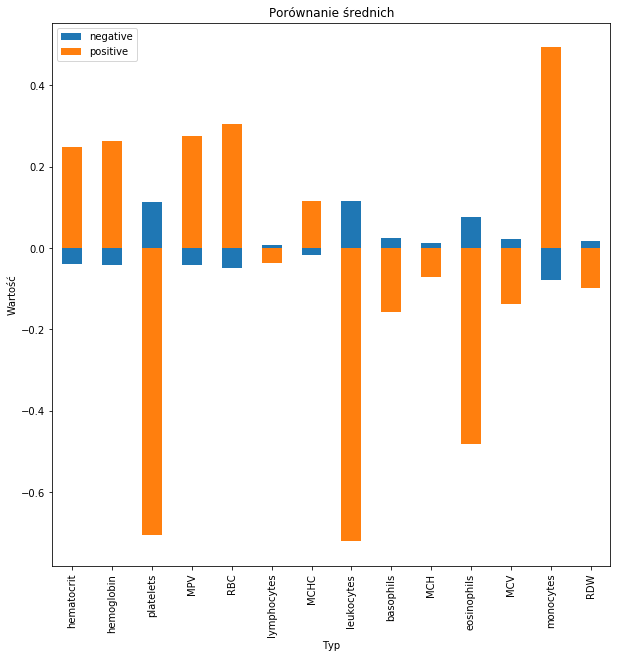

In [811]:
plotdata = pd.DataFrame({
    "negative": [avg_negative_hematocrit, avg_negative_hemoglobin, avg_negative_platelets, avg_negative_MPV, avg_negative_RBC, avg_negative_lymphocytes, avg_negative_MCHC, avg_negative_leukocytes, avg_negative_basophils, avg_negative_MCH, avg_negative_eosinophils, avg_negative_MCV, avg_negative_monocytes, avg_negative_RDW],
    "positive": [avg_positive_hematocrit, avg_positive_hemoglobin, avg_positive_platelets, avg_positive_MPV, avg_positive_RBC, avg_positive_lymphocytes, avg_positive_MCHC, avg_positive_leukocytes, avg_positive_basophils, avg_positive_MCH, avg_positive_eosinophils, avg_positive_MCV, avg_positive_monocytes, avg_positive_RDW]
},
index=['hematocrit', 'hemoglobin', 'platelets', 'MPV', 'RBC', 'lymphocytes', 'MCHC', 'leukocytes', 'basophils', 'MCH', 'eosinophils', 'MCV', 'monocytes', 'RDW'])
plotdata.plot(kind="bar", stacked=True)

plt.title('Porównanie średnich')
plt.xlabel('Typ')
plt.ylabel('Wartość')
plt.show()

Oczywiście na powyższym wykresie widzimi różnice między odległościami

In [812]:
median_negative_hematocrit= np.median(negative_hematocrit)
median_positive_hematocrit= np.median(positive_hematocrit)

median_negative_hemoglobin = np.median(negative_hemoglobin)
median_positive_hemoglobin = np.median(positive_hemoglobin)

median_negative_platelets = np.median(negative_platelets)
median_positive_platelets = np.median(positive_platelets)

median_negative_MPV = np.median(negative_MPV)
median_positive_MPV = np.median(positive_MPV)

median_negative_RBC = np.median(negative_RBC)
median_positive_RBC = np.median(positive_RBC)

median_negative_lymphocytes = np.median(negative_lymphocytes)
median_positive_lymphocytes = np.median(positive_lymphocytes)

median_negative_MCHC = np.median(negative_MCHC)
median_positive_MCHC = np.median(positive_MCHC)

median_negative_leukocytes = np.median(negative_leukocytes)
median_positive_leukocytes = np.median(positive_leukocytes)

median_negative_basophils = np.median(negative_basophils)
median_positive_basophils = np.median(positive_basophils)

median_negative_MCH = np.median(negative_MCH)
median_positive_MCH = np.median(positive_MCH)

median_negative_eosinophils = np.median(negative_eosinophils)
median_positive_eosinophils = np.median(positive_eosinophils)

median_negative_MCV = np.median(negative_MCV)
median_positive_MCV = np.median(positive_MCV)

median_negative_monocytes = np.median(negative_monocytes)
median_positive_monocytes = np.median(positive_monocytes)

median_negative_RDW = np.median(negative_RDW)
median_positive_RDW = np.median(positive_RDW)

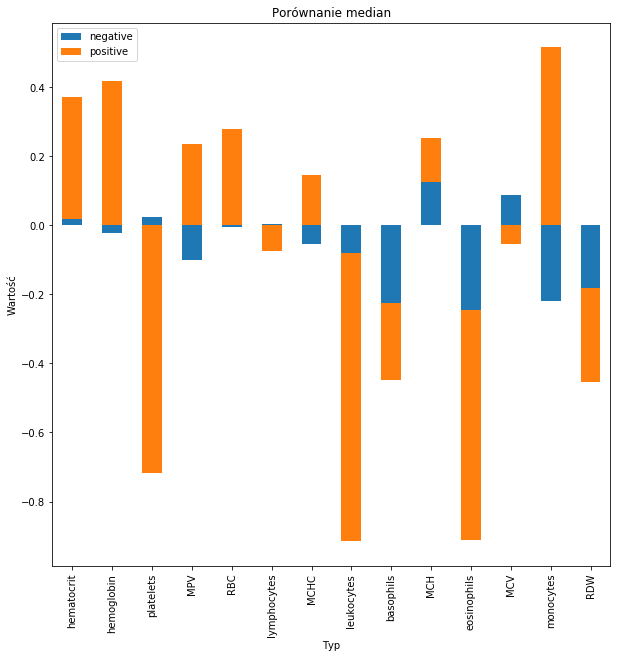

In [813]:
plotdata = pd.DataFrame({
    "negative": [median_negative_hematocrit, median_negative_hemoglobin, median_negative_platelets, median_negative_MPV, median_negative_RBC, median_negative_lymphocytes, median_negative_MCHC, median_negative_leukocytes, median_negative_basophils, median_negative_MCH, median_negative_eosinophils, median_negative_MCV, median_negative_monocytes, median_negative_RDW],
    "positive": [median_positive_hematocrit, median_positive_hemoglobin, median_positive_platelets, median_positive_MPV, median_positive_RBC, median_positive_lymphocytes, median_positive_MCHC, median_positive_leukocytes, median_positive_basophils, median_positive_MCH, median_positive_eosinophils, median_positive_MCV, median_positive_monocytes, median_positive_RDW]
},
index=['hematocrit', 'hemoglobin', 'platelets', 'MPV', 'RBC', 'lymphocytes', 'MCHC', 'leukocytes', 'basophils', 'MCH', 'eosinophils', 'MCV', 'monocytes', 'RDW'])

plotdata.plot(kind="bar", stacked=True)


plt.title('Porównanie median')
plt.xlabel('Typ')
plt.ylabel('Wartość')
plt.show()

Oczywiście na powyższym wykresie widzimi różnice między odległościami

# Korelacje pomiędzy parametrami krwi.

## 1. U osób chorych.

In [814]:
df3 = df2_positive.drop(['Patient_age_quantile', 'SARS-Cov-2_exam_result', 'Patient_addmited_to_regular_ward__1=yes,_0=no_', 'Patient_addmited_to_intensive_care_unit__1=yes,_0=no_', 'Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_'], axis=1)

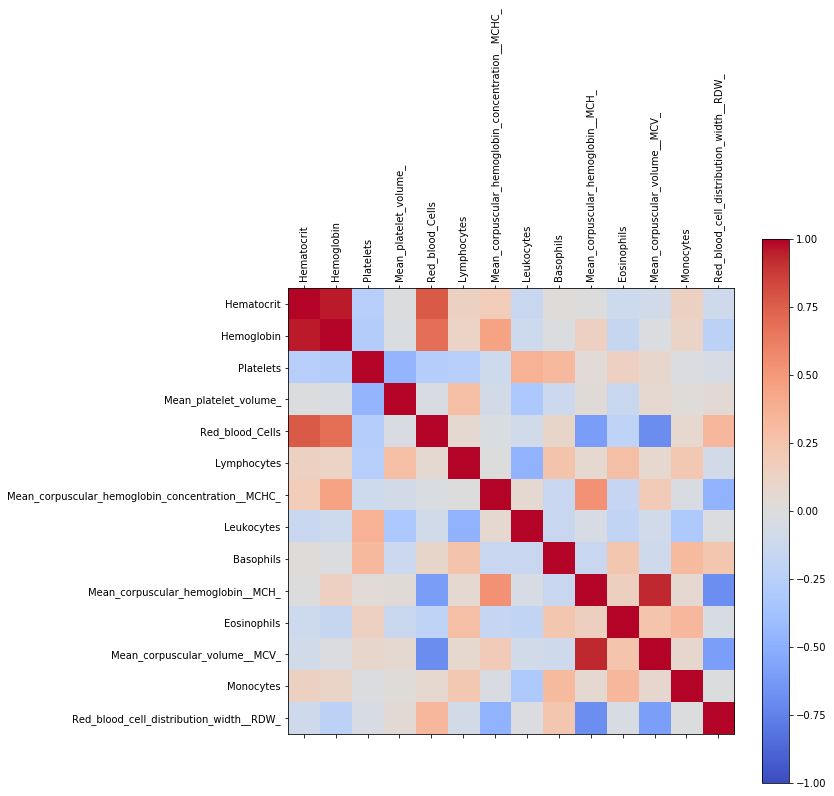

In [815]:
positive = df3
corr = positive.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(positive.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(positive.columns)
ax.set_yticklabels(positive.columns)
plt.show()

#fig.savefig("korelacje_chorych.png", bbox_inches='tight', dpi=600)

Istnieją silne korelacje pomiędzy np. hematokrytem i hemoglobiną i erytrocytami i MCH, a MCV.

## 2. U osób zdrowych. 

In [816]:
df4 = df2_negative.drop(['Patient_age_quantile', 'SARS-Cov-2_exam_result', 'Patient_addmited_to_regular_ward__1=yes,_0=no_', 'Patient_addmited_to_intensive_care_unit__1=yes,_0=no_', 'Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_'], axis=1)

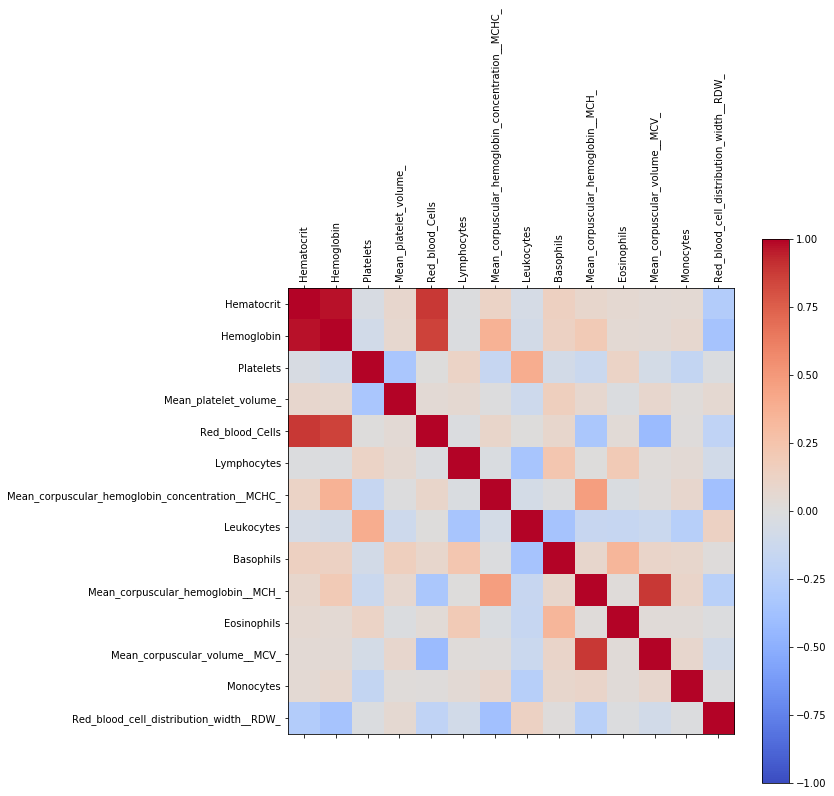

In [817]:
negative = df4
corr = negative.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(negative.columns)
ax.set_yticklabels(negative.columns)
plt.show()

#fig.savefig("korelacje_zdrowych.png", bbox_inches='tight', dpi=600)

Istnieją jeszcze silniejsze korelacje pomiędzy np. hematokrytem i hemoglobiną i erytrocytami.

## 3. Porównanie

Różnice dostrzegam między płytkami krwi/bazofilami, MPV/limfocytami. Największe wahania są między erytrocytami, eozynofilami,  mcv, monocytami, rdw. 

# Klasyfikacja

### 1. Podział na grupy treningową i testową

In [818]:
df2 = df2.drop(['Patient_age_quantile', 'Patient_addmited_to_regular_ward__1=yes,_0=no_', 'Patient_addmited_to_intensive_care_unit__1=yes,_0=no_', 'Patient_addmited_to_semi-intensive_unit__1=yes,_0=no_'], axis=1)

In [819]:
df2

,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,negative,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
599,negative,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
600,negative,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
601,negative,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


In [820]:
from sklearn.model_selection import train_test_split

In [821]:
X_train, X_test = train_test_split(df2, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [822]:
X_train

,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,negative,0.534067,0.416252,0.248857,-0.550290,0.384090,-0.918346,-0.253742,-0.645603,0.387152,-0.030911,-0.456253,0.126132,1.014127,-0.271247
1,negative,-0.450142,-0.335620,0.223734,1.132609,0.190156,-0.730707,0.343725,0.592739,-0.529226,-0.971801,0.133698,-1.255906,-0.482876,0.790231
2,positive,0.694287,0.541564,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,-0.835508,0.025985,0.567652,-0.182790
3,negative,2.662704,2.671868,-1.158065,-0.101517,3.028643,0.053965,0.542882,-0.250447,-0.223767,-0.710443,0.007280,-1.055610,-0.666718,0.171035
4,negative,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,negative,1.243612,0.980156,0.198610,0.683835,0.842479,1.230973,-0.652057,-1.065805,1.914447,0.125903,2.493503,0.446606,-0.798034,0.171035
414,negative,-0.289922,-0.335620,0.223734,-0.213711,-0.673732,-0.585713,-0.253742,-0.692910,0.081693,0.648619,0.470813,0.887256,0.672705,0.259492
415,negative,0.785841,0.416252,-1.158065,2.927700,-0.127191,-1.617727,-1.149948,0.673440,0.081693,0.962249,-0.751229,1.688438,-1.113193,2.470904
416,positive,0.442512,0.290940,-1.258560,2.030154,0.401720,-0.449248,-0.452899,-0.965624,-0.529226,-0.292269,-0.456253,-0.074163,1.276759,0.171035


In [823]:
X_test

,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
0,negative,1.266501,1.293436,-0.228491,-0.550290,0.877740,0.813050,0.343725,-0.389586,0.692611,0.544077,0.175837,0.426576,-0.535402,-0.625073
1,negative,0.579844,0.792188,-0.906829,-0.774677,0.172526,0.130727,0.941197,-0.467504,-0.223767,1.014521,0.512953,0.646902,1.408075,-0.182790
2,negative,-0.038148,-0.210308,-0.454604,-1.560029,-0.285863,0.002791,-0.652057,0.077923,0.081693,0.125903,-0.624811,0.486665,-0.824298,0.082579
3,negative,0.579844,0.290940,-0.077750,-1.223449,-0.021409,0.147785,-0.950790,-0.230967,-0.223767,0.491805,-0.666950,1.067522,-0.193981,-0.890442
4,negative,0.328069,0.792188,0.060430,2.366734,0.154896,0.454830,1.837398,-0.189225,1.303529,1.066793,0.555092,0.226280,0.357547,-0.625073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,negative,-0.793470,-0.899524,-1.183189,2.591120,-0.814774,-1.711547,-0.652057,-0.962841,-1.140144,-0.135455,-0.751229,0.186222,-0.193981,-0.448160
176,negative,-0.038148,-0.335620,1.153308,-1.335643,-0.673732,0.412185,-1.149948,0.784752,-0.223767,0.648619,-0.835508,1.387995,0.121178,1.232513
177,negative,-0.701917,-0.460932,0.437284,-0.662483,-0.814774,0.668057,0.841616,-0.489767,0.387152,0.753163,-0.371974,0.386517,0.462600,0.967144
178,negative,-0.106813,0.353596,-0.994762,1.356995,0.013852,-0.773352,1.837398,-0.428545,2.525365,0.544077,0.850067,-0.274459,1.145443,-1.244268


### 2. Klasyfikator regresji logistycznej

In [824]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [825]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [826]:
train_variables = X_train.iloc[: ,1:15]
train_result = X_train['SARS-Cov-2_exam_result']
test_variables = X_test.iloc[: ,1:15]
test_result = X_test['SARS-Cov-2_exam_result']

In [827]:
logreg = LogisticRegression()
logreg.fit(train_variables,train_result)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [828]:
y_pred = logreg.predict(test_variables)
cnf_matrix = metrics.confusion_matrix(test_result, y_pred)
print(cnf_matrix)

[[156   3]
 [ 15   6]]


Text(69.0, 0.5, 'y')

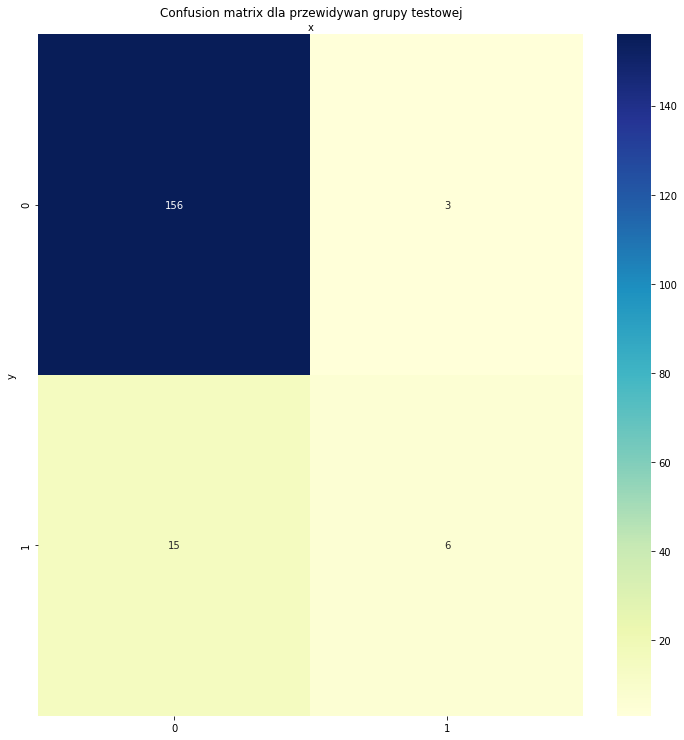

In [829]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix dla przewidywan grupy testowej', y=1.1)
plt.xlabel('x')
plt.ylabel('y')

In [830]:
X_test.groupby('SARS-Cov-2_exam_result').count()

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_
SARS-Cov-2_exam_result,,,,,,,,,,,,,,
negative,159,159,159,159,159,159,159,159,159,159,159,159,159,159
positive,21,21,21,21,21,21,21,21,21,21,21,21,21,21
